import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
wine=pd.read_csv('winequality-red.csv')

wine.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
x=wine.drop(['quality'],axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
y=wine['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

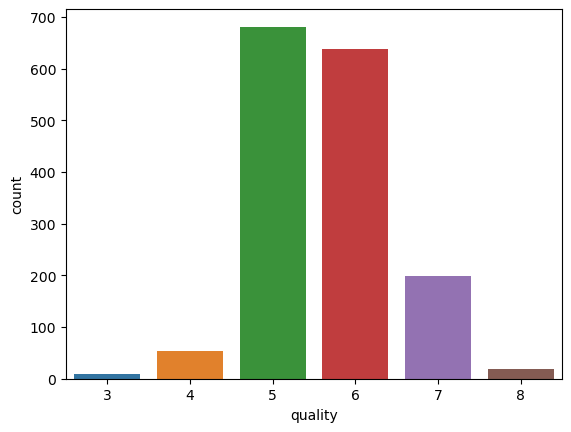

In [6]:
sns.countplot(x=y)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
y_train.shape,y_test.shape

((1119,), (480,))

In [8]:
lrm=LinearRegression()
lrm.fit(X_train,y_train)
y_pred=lrm.predict(X_test)
k=lrm.score(X_test,y_test)
k

0.3283159663563405

<Axes: xlabel='quality'>

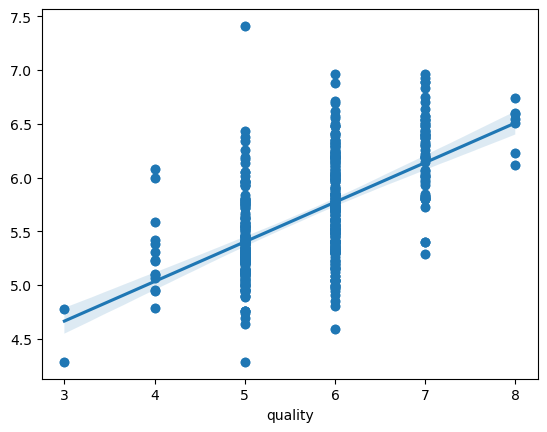

In [9]:
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

In [10]:
lrm.predict([[7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4]])


c:\Users\Hariharan V\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.00138123])

In [13]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)

In [26]:
adj_r2 = 1-((1-r2)*(len(x)-1)/(len(x)-len(y_test)-1))

In [28]:
r2,adj_r2

(0.3283159663563405, 0.03993641702811457)